In [23]:
import os
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle as pk
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
Text = df.text
Text

,text
0,WASHINGTON (Reuters) - The U.S. Department of ...
1,HILL larious! If this was a Donald Trump pi a...
2,MANILA (Reuters) - Philippine President Rodrig...
3,WASHINGTON (Reuters) - Vice President Joe Bide...
4,Donald Trump kicked off his Monday morning by ...
...,...
22839,WASHINGTON (Reuters) - The FBI said on Sunday ...
22840,MOSCOW (Reuters) - Russia is open to working w...
22841,HOUSTON (Reuters) - Buckeye Partners LP s Yabu...
22842,TALLINN (Reuters) - German Chancellor Angela M...


In [4]:
Text.isnull().sum()

np.int64(0)

In [5]:
Target = df.label
Target

,label
0,0
1,1
2,0
3,0
4,1
...,...
22839,0
22840,0
22841,0
22842,0


In [6]:
vectorizer = TfidfVectorizer()
Text_usable = vectorizer.fit_transform(Text)
print(Text_usable)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4712086 stored elements and shape (22844, 83197)>
  Coords	Values
  (0, 80076)	0.018572129568662974
  (0, 63239)	0.011613914330771203
  (0, 74092)	0.2847249519007922
  (0, 21895)	0.05410635314508267
  (0, 53722)	0.08595584667260928
  (0, 21381)	0.0932642251315629
  (0, 7076)	0.12560979137709108
  (0, 44865)	0.41304481105146196
  (0, 46905)	0.04502775590823342
  (0, 19110)	0.12419039779137794
  (0, 44774)	0.07068884921415002
  (0, 7980)	0.0567557865208854
  (0, 17209)	0.030411499138157473
  (0, 74940)	0.08489634340868746
  (0, 21020)	0.05573855288318649
  (0, 29494)	0.11809436212692913
  (0, 18785)	0.10213076307119068
  (0, 81580)	0.08354602277712715
  (0, 6536)	0.034754394487919324
  (0, 11516)	0.062248815228881406
  (0, 8288)	0.03628221142181855
  (0, 51595)	0.07521695109612872
  (0, 57876)	0.05688985693008562
  (0, 13317)	0.03457933416918461
  (0, 58942)	0.12572091957575465
  :	:
  (22843, 81634)	0.5493941995902419
  (2284

In [7]:
X_train,X_test,y_train,y_test = train_test_split(Text_usable,Target,test_size=.15,shuffle=True,random_state=42)

In [8]:
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (19417, 83197)
X_test Shape : (3427, 83197)
y_train Shape : (19417,)
y_test Shape : (3427,)


In [9]:
model = Pipeline([
    ('model',LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=42))
    ])
model.fit(X_train,y_train)

Pipeline(steps=[('model', LogisticRegression(random_state=42, solver='sag'))])

In [10]:
y_pred = model.predict(X_test)

In [11]:
df = pd.DataFrame()
df['Actual'],df['Predicted'] = y_test,y_pred
df.replace(1,'R',inplace=True)
df.replace(0,'F',inplace=True)
df

,Actual,Predicted
8323,F,F
11037,F,F
22645,F,F
9851,F,F
13662,F,F
...,...,...
6315,F,F
18120,F,F
11429,F,F
8352,R,R


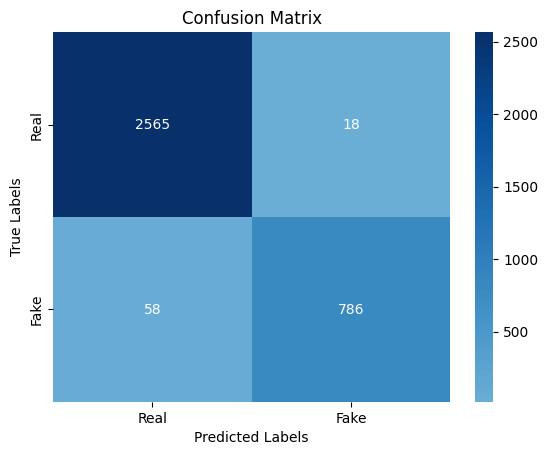

array([[2565,   18],
       [  58,  786]])

In [16]:
CM = confusion_matrix(y_test, y_pred)
target_names = ['Real', 'Fake']
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues',xticklabels=target_names,yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
CM

In [17]:
ClassificationReport = classification_report(y_test,y_pred,target_names=target_names)
print('Classification Report is :\n ', ClassificationReport)

Classification Report is :
                precision    recall  f1-score   support

        Real       0.98      0.99      0.99      2583
        Fake       0.98      0.93      0.95       844

    accuracy                           0.98      3427
   macro avg       0.98      0.96      0.97      3427
weighted avg       0.98      0.98      0.98      3427



Otimizando o modelo

In [18]:
combined_df = pd.DataFrame({'text': Text, 'label': Target})
combined_df.dropna(subset=['text', 'label'], inplace=True)

Text = combined_df['text']
Target = combined_df['label']

In [19]:
vectorizer = TfidfVectorizer()
Text_usable = vectorizer.fit_transform(Text.fillna(''))
print(Text_usable)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4712086 stored elements and shape (22844, 83197)>
  Coords	Values
  (0, 80076)	0.018572129568662974
  (0, 63239)	0.011613914330771203
  (0, 74092)	0.2847249519007922
  (0, 21895)	0.05410635314508267
  (0, 53722)	0.08595584667260928
  (0, 21381)	0.0932642251315629
  (0, 7076)	0.12560979137709108
  (0, 44865)	0.41304481105146196
  (0, 46905)	0.04502775590823342
  (0, 19110)	0.12419039779137794
  (0, 44774)	0.07068884921415002
  (0, 7980)	0.0567557865208854
  (0, 17209)	0.030411499138157473
  (0, 74940)	0.08489634340868746
  (0, 21020)	0.05573855288318649
  (0, 29494)	0.11809436212692913
  (0, 18785)	0.10213076307119068
  (0, 81580)	0.08354602277712715
  (0, 6536)	0.034754394487919324
  (0, 11516)	0.062248815228881406
  (0, 8288)	0.03628221142181855
  (0, 51595)	0.07521695109612872
  (0, 57876)	0.05688985693008562
  (0, 13317)	0.03457933416918461
  (0, 58942)	0.12572091957575465
  :	:
  (22843, 81634)	0.5493941995902419
  (2284

In [20]:
X_train, X_test, y_train, y_test = train_test_split(Text, Target, shuffle=True, test_size=0.20, random_state=42)

In [21]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=2000))
])

Aplicando Grid Search

In [22]:
param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_features': [10000, 20000, 30000],
    'tfidf__min_df': [2, 5],
    'tfidf__max_df': [0.9, 0.95],
    'tfidf__sublinear_tf': [True],
    'clf__C': [0.1, 1, 5],
    'clf__class_weight': [None, 'balanced'],
    'clf__solver': ['liblinear']
}

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=skf,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(Text, Target)

print("Melhores parâmetros:")
print(grid_search.best_params_)

print("Melhor F1 (CV):")
print(grid_search.best_score_)

best_model = grid_search.best_estimator_

##########
#Fitting 5 folds for each of 144 candidates, totalling 720 fits
#Melhores parâmetros:
#{'clf__C': 5, 'clf__class_weight': 'balanced', 'clf__solver': 'liblinear', 'tfidf__max_df': 0.9, 'tfidf__max_features': 10000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2), 'tfidf__sublinear_tf': True}
#Melhor F1 (CV):
#0.980117211135061
##########


In [24]:
best_model = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_df=0.9,
        max_features=10000,
        min_df=2,
        ngram_range=(1, 2),
        sublinear_tf=True
    )),
    ("clf", LogisticRegression(
        C=5,
        class_weight="balanced",
        solver="liblinear",
        max_iter=1000
    ))
])

In [25]:
best_model.fit(Text, Target)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, max_features=10000, min_df=2,
                                 ngram_range=(1, 2), sublinear_tf=True)),
                ('clf',
                 LogisticRegression(C=5, class_weight='balanced', max_iter=1000,
                                    solver='liblinear'))])

In [26]:
def optimize_threshold(model, X, y):

    probs = model.predict_proba(X)[:, 1]
    thresholds = np.linspace(0.01, 0.99, 500)

    best_threshold = 0.5
    best_f1 = 0

    for t in thresholds:
        preds = (probs >= t).astype(int)
        score = f1_score(y, preds)

        if score > best_f1:
            best_f1 = score
            best_threshold = t

    return best_threshold, best_f1

In [27]:
best_threshold, best_f1 = optimize_threshold(best_model, Text, Target)

print("Melhor threshold:", best_threshold)
print("Melhor F1 com threshold otimizado:", best_f1)

Melhor threshold: 0.6207815631262525
Melhor F1 com threshold otimizado: 0.9978973190818293


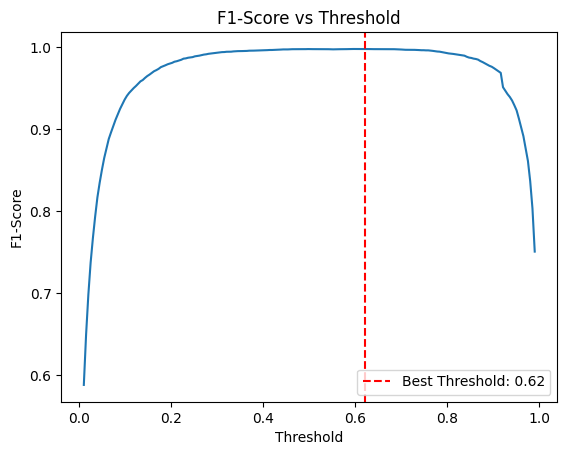

Melhor threshold encontrado: 0.6206532663316583
Melhor F1: 0.9978973190818293


In [28]:
# Probabilidades no conjunto de validação (usando o dataset completo, como na otimização do threshold)
val_probs = best_model.predict_proba(Text)[:, 1]

# Intervalo de thresholds
thresholds = np.linspace(0.01, 0.99, 200)
f1_scores = []

for t in thresholds:
    preds = (val_probs >= t).astype(int)
    f1 = f1_score(Target, preds)
    f1_scores.append(f1)

# Melhor ponto
best_idx = np.argmax(f1_scores)
best_threshold_curve = thresholds[best_idx]
best_f1_curve = f1_scores[best_idx]

# Plot
plt.figure()
plt.plot(thresholds, f1_scores)
plt.xlabel("Threshold")
plt.ylabel("F1-Score")
plt.title("F1-Score vs Threshold")
plt.axvline(best_threshold_curve, color='r', linestyle='--', label=f'Best Threshold: {best_threshold_curve:.2f}')
plt.legend()
plt.show()

print("Melhor threshold encontrado:", best_threshold_curve)
print("Melhor F1:", best_f1_curve)

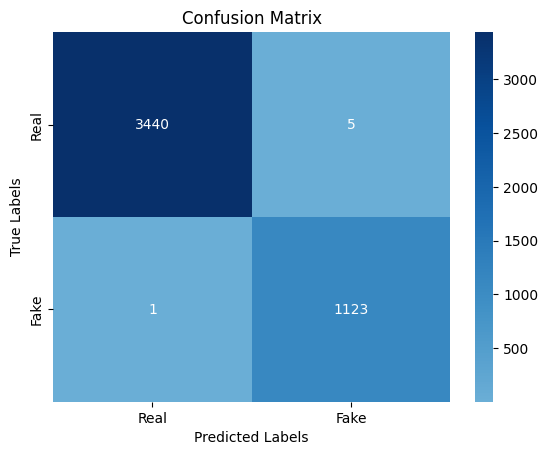

array([[3440,    5],
       [   1, 1123]])

In [29]:
y_pred_best_model = best_model.predict(X_test)
CM = confusion_matrix(y_test, y_pred_best_model)
target_names = ['Real', 'Fake']
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues',xticklabels=target_names,yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
CM

In [30]:
#criando o arquivo submission
test = pd.read_csv('/content/test.csv') # Load the test data
test_probs = best_model.predict_proba(test['text'].fillna(''))[:,1]
test_preds = (test_probs >= best_threshold).astype(int)

submission = pd.DataFrame({
    'id': test['id'],
    'target': test_preds
})

submission.to_csv('submission.csv', index=False)